In [107]:
!pip install pandas openpyxl scipy matplotlib seaborn


Defaulting to user installation because normal site-packages is not writeable


In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
# Load Excel file
file_path = r"C:\Users\User\Desktop\insurance_claims_raw.xlsx"

In [110]:
# Load into a pandas DataFrame
df = pd.read_excel(file_path)

In [111]:
# Show first 5 rows
print(df.head())

   months_as_customer   age  policy_number policy_bind_date policy_state  \
0                 328  48.0         521585       2014-10-17           OH   
1                 228  42.0         342868       2006-06-27           IN   
2                 134  29.0         687698       2000-09-06           OH   
3                 256  41.0         227811       1990-05-25           IL   
4                 228  44.0         367455       2014-06-06           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500             1000.0                1406.91               0   
1    250/500             2000.0                1197.22         5000000   
2    100/300             2000.0                1413.14         5000000   
3    250/500             2000.0                1415.74         6000000   
4   500/1000             1000.0                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...

In [112]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           1000 non-null   int64         
 1   age                          998 non-null    float64       
 2   policy_number                1000 non-null   int64         
 3   policy_bind_date             1000 non-null   datetime64[ns]
 4   policy_state                 1000 non-null   object        
 5   policy_csl                   1000 non-null   object        
 6   policy_deductable            998 non-null    float64       
 7   policy_annual_premium        997 non-null    float64       
 8   umbrella_limit               1000 non-null   int64         
 9   insured_zip                  1000 non-null   int64         
 10  insured_sex                  1000 non-null   object        
 11  insured_education_level      999 non-null   

In [113]:
# Show all column names
print("Columns in the dataset:")
print(df.columns.tolist())

Columns in the dataset:
['months_as_customer', 'age', 'policy_number', 'policy_bind_date', 'policy_state', 'policy_csl', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'capital-gains', 'capital-loss', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'property_damage', 'bodily_injuries', 'witnesses', 'police_report_available', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make', 'auto_model', 'auto_year', 'fraud_reported', '_c39']


In [114]:
# Check for duplicates
duplicates_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates_count}")

Number of duplicate rows: 0


There are no duplicates

In [115]:
# Check for null (NaN) values in each column
print("Null values per column:")
print(df.isnull().sum())

Null values per column:
months_as_customer                0
age                               2
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 2
policy_annual_premium             3
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           1
insured_occupation                0
insured_hobbies                   2
insured_relationship              0
capital-gains                     2
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted            93
incident_state                    2
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
prop

In [116]:
# Check for fully empty rows (all values are NaN)
empty_rows = df[df.isnull().all(axis=1)]
print(f"\nNumber of completely empty rows: {len(empty_rows)}")


Number of completely empty rows: 0


In [117]:
# Check for partially empty rows (any value is NaN)
partial_empty_rows = df[df.isnull().any(axis=1)]
print(f"Number of rows with at least one null: {len(partial_empty_rows)}")

Number of rows with at least one null: 1000


All The rows contain atleast one null value therefore dropping rows will wipe out your whole dataset. And since I will be doing ML models, the way to go is imputation (replacing missing values with something meaningful).

In [118]:
# Imputation of Numeric: using median
df["total_claim_amount"].fillna(df["total_claim_amount"].median(), inplace=True)
df["policy_annual_premium"].fillna(df["policy_annual_premium"].median(), inplace=True)
df["age"].fillna(df["age"].median(), inplace=True)

# Imputation of Deductible: using mode 
df["policy_deductable"].fillna(df["policy_deductable"].mode()[0], inplace=True)

# Imputation of Claims: missing likely means no claim then set to 0
df["injury_claim"].fillna(0, inplace=True)
df["property_claim"].fillna(0, inplace=True)
df["capital-gains"].fillna(0, inplace=True)

# Imputation of Categoricals: fill with mode
df["insured_hobbies"].fillna(df["insured_hobbies"].mode()[0], inplace=True)
df["insured_education_level"].fillna(df["insured_education_level"].mode()[0], inplace=True)
df["authorities_contacted"].fillna(df["authorities_contacted"].mode()[0], inplace=True)
df["incident_state"].fillna(df["incident_state"].mode()[0], inplace=True)

C:\Users\Tsholofelo\AppData\Local\Temp\ipykernel_17728\2625116280.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["total_claim_amount"].fillna(df["total_claim_amount"].median(), inplace=True)
C:\Users\Tsholofelo\AppData\Local\Temp\ipykernel_17728\2625116280.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting

In [119]:
# Check results
print("Null values left per column:")
print(df.isnull().sum())

Null values left per column:
months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0

In [120]:
# Save cleaned dataset
df.to_excel("insurance_claims_cleaned.xlsx", index=False)
print("Cleaning complete! Saved as insurance_claims_cleaned.xlsx")

Cleaning complete! Saved as insurance_claims_cleaned.xlsx


----- Summary (Numeric Variables) -----
       months_as_customer          age  policy_number  \
count         1000.000000  1000.000000    1000.000000   
mean           203.954000    38.961000  546238.648000   
min              0.000000    19.000000  100804.000000   
25%            115.750000    32.000000  335980.250000   
50%            199.500000    38.000000  533135.000000   
75%            276.250000    44.000000  759099.750000   
max            479.000000    64.000000  999435.000000   
std            115.113174     9.126378  257063.005276   

                    policy_bind_date  policy_deductable  \
count                           1000        1000.000000   
mean   2002-02-08 04:40:47.999999872        1134.000000   
min              1990-01-08 00:00:00         500.000000   
25%              1995-09-19 00:00:00         500.000000   
50%              2002-04-01 12:00:00        1000.000000   
75%              2008-04-21 12:00:00        2000.000000   
max              2015-02-22 00:00

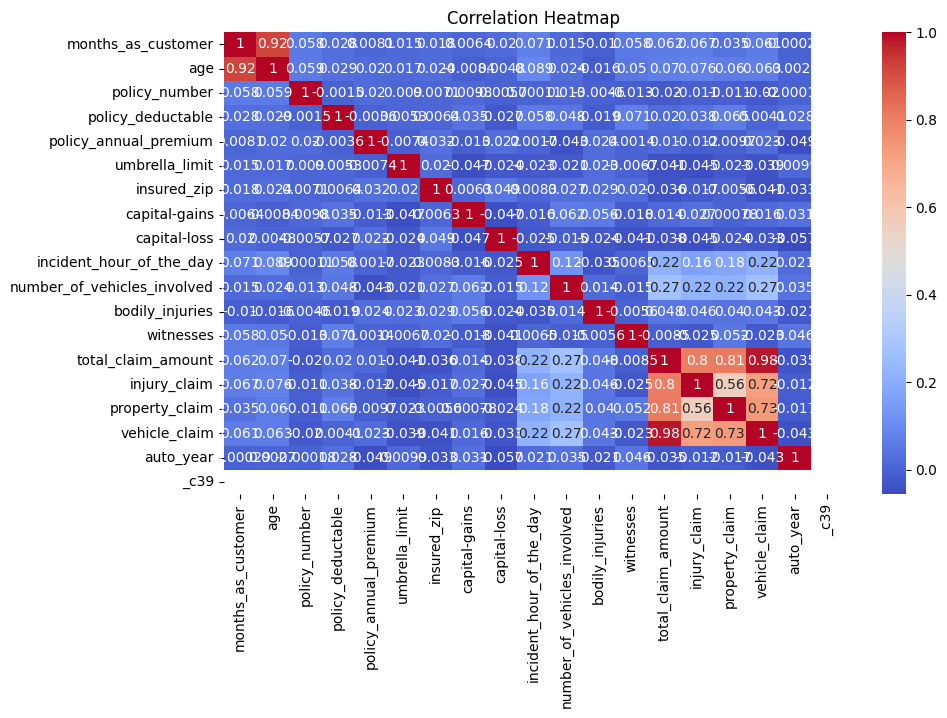


T-test: Male vs Female Claims
t-statistic: -0.7958, p-value: 0.4264

Chi-Square Test: Fraud vs Authorities Contacted
Chi2: 18.1415, p-value: 0.0004, dof: 3

ANOVA: Claim Amounts across States
F-statistic: 2.1730, p-value: 0.0434

----- Loss Ratio Summary -----
count    1000.000000
mean       43.764872
std        24.561970
min         0.067452
25%        32.420520
50%        44.975200
75%        58.668974
max       157.988148
Name: loss_ratio, dtype: float64


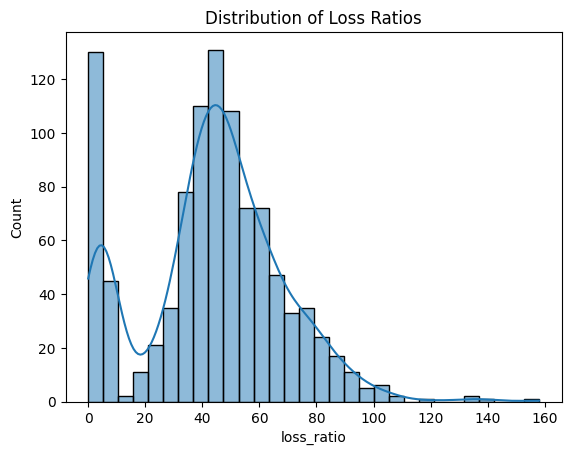

In [121]:
#Statistical Data Analysis
# Load cleaned dataset
df = pd.read_excel("insurance_claims_cleaned.xlsx")   # <-- use your cleaned file


# Descriptive Statistics
print("----- Summary (Numeric Variables) -----")
print(df.describe())

print("\n----- Categorical Counts -----")
print(df["insured_hobbies"].value_counts())
print(df["incident_state"].value_counts())

# Check Correlations
numeric_corr = df.corr(numeric_only=True)
print("\n----- Correlation Matrix -----")
print(numeric_corr)

plt.figure(figsize=(10,6))
sns.heatmap(numeric_corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Hypothesis Testing
# T-test to Compare claim amounts between males vs females
male_claims = df[df["insured_sex"]=="MALE"]["total_claim_amount"]
female_claims = df[df["insured_sex"]=="FEMALE"]["total_claim_amount"]

t_stat, p_val = stats.ttest_ind(male_claims, female_claims, nan_policy="omit")
print("\nT-test: Male vs Female Claims")
print(f"t-statistic: {t_stat:.4f}, p-value: {p_val:.4f}")

# Chi-square test to check Fraud reported vs authorities contacted
contingency = pd.crosstab(df["fraud_reported"], df["authorities_contacted"])
chi2, p, dof, expected = stats.chi2_contingency(contingency)
print("\nChi-Square Test: Fraud vs Authorities Contacted")
print(f"Chi2: {chi2:.4f}, p-value: {p:.4f}, dof: {dof}")

# ANOVA Test
# Compare claim amounts across states
anova_groups = [group["total_claim_amount"].values for name, group in df.groupby("incident_state")]
f_stat, p_val = stats.f_oneway(*anova_groups)
print("\nANOVA: Claim Amounts across States")
print(f"F-statistic: {f_stat:.4f}, p-value: {p_val:.4f}")

# Risk Analysis
df["loss_ratio"] = df["total_claim_amount"] / df["policy_annual_premium"]
print("\n----- Loss Ratio Summary -----")
print(df["loss_ratio"].describe())

sns.histplot(df["loss_ratio"], bins=30, kde=True)
plt.title("Distribution of Loss Ratios")
plt.show()